In [55]:
import pandas as pd

In [57]:
df = pd.read_csv("../data/raw/AB_NYC_2019.csv")

In [59]:
display(df, df.isna().sum(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

None

In [61]:
df.duplicated(['host_name']).sum()

37442

In [63]:
# Reviews_per_month: to DROP NaN Rows
new_df=df.dropna(subset=['last_review', 'reviews_per_month'])
# Fill missing 'name' and 'host_name' with 'Unknown' using .loc to avoid chained assignment
new_df.loc[:, 'name'] = new_df['name'].fillna('Unknown')
new_df.loc[:, 'host_name'] = new_df['host_name'].fillna('Unknown')
new_df.isna().any()

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [65]:
# last_review : to  DROP Column
clean_df = new_df.drop(columns=['last_review'])
clean_df

id                                              name    host_id  \
0          2539                Clean & quiet apt home by the park       2787   
1          2595                             Skylit Midtown Castle       2845   
3          3831                   Cozy Entire Floor of Brownstone       4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099         Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                               ...        ...   
48782  36425863        Lovely Privet Bedroom with Privet Restroom   83554966   
48790  36427429                          No.2 with queen size bed  257683179   
48799  36438336                                   Seas The Moment  211644523   
48805  36442252                     1B-1B apartment near by Metro  273841667   
48852  36455809           Cozy Private Room in Bushwick, Brooklyn   74162901   

         host_name neighbourhood_group    neighbourhood  latitude  longitude  \
0             John            Brooklyn       Kensington  40.64749  -73.97237   
1         Jennifer           Manhattan          Midtown  40.75362  -73.98377   
3      LisaRoxanne            Brooklyn     Clinton Hill  40.68514  -73.95976   
4            Laura           Manhattan      East Harlem  40.79851  -73.94399   
5            Chris           Manhattan      Murray Hill  40.74767  -73.97500   
...            ...                 ...              ...       ...        ...   
48782        Rusaa           Manhattan  Upper East Side  40.78099  -73.95366   
48790         H Ai              Queens         Flushing  40.75104  -73.81459   
48799          Ben       Staten Island      Great Kills  40.54179  -74.14275   
48805       Blaine               Bronx       Mott Haven  40.80787  -73.92400   
48852    Christine            Brooklyn         Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews  \
0         Private room    149               1                  9   
1      Entire home/apt    225               1                 45   
3      Entire home/apt     89               1                270   
4      Entire home/apt     80              10                  9   
5      Entire home/apt    200               3                 74   
...                ...    ...             ...                ...   
48782     Private room    129               1                  1   
48790     Private room     45               1                  1   
48799     Private room    235               1                  1   
48805  Entire home/apt    100               1                  2   
48852     Private room     30               1                  1   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
3                   4.64                               1               194  
4                   0.10                               1                 0  
5                   0.59                               1               129  
...                  ...                             ...               ...  
48782               1.00                               1               147  
48790               1.00                               6               339  
48799               1.00                               1                87  
48805               2.00                               1                40  
48852               1.00                               1                 1  

[38843 rows x 15 columns]

In [67]:
# create a copy of the cleaned data
clean_df.to_csv('airbnb.csv', index=False)

Analysis of the data:
 
What is the correlation between Prices and length of stay?

In [70]:
import plotly.express as px
import plotly.graph_objects as go

In [103]:
# Filter the data for stays with a maximum of 7 nights
filtered_min_nights_df = clean_df[clean_df['minimum_nights'] <= 7]

# Display the unique values in the 'minimum_nights' column
unique_min_nights = filtered_min_nights_df['minimum_nights'].unique()
print("Unique values in 'minimum_nights' (max 7 nights):")
display(unique_min_nights)

Unique values in 'minimum_nights' (max 7 nights):


array([1, 3, 2, 5, 4, 7, 6])

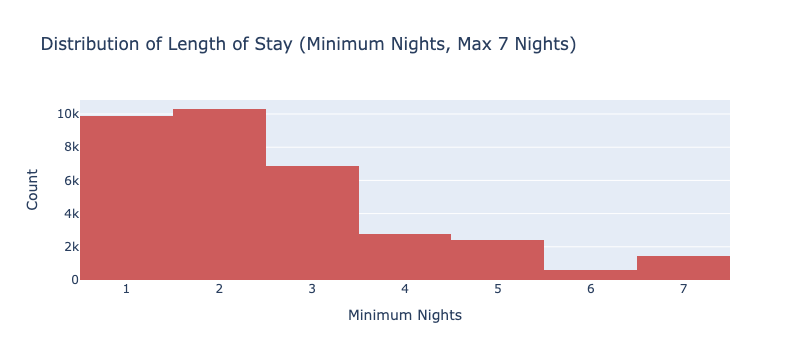

In [109]:
# Analyze the distribution of length of stay (minimum_nights) with a max of 7 nights
fig_min_nights_filtered = px.histogram(
    filtered_min_nights_df, 
    x='minimum_nights', 
    nbins=10, 
    title='Distribution of Length of Stay (Minimum Nights, Max 7 Nights)',
    labels={'minimum_nights': 'Minimum Nights'},
    color_discrete_sequence=['indianred']
)

fig_min_nights_filtered.update_layout(
    xaxis_title="Minimum Nights",
    yaxis_title="Count",
)
fig_min_nights_filtered.show()

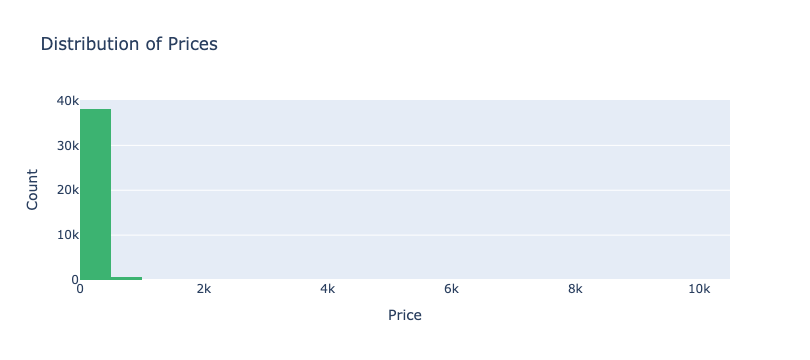

Summary Statistics for Price:
count    38843.000000
mean       142.317947
std        196.945624
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64


In [111]:
# Analyze the distribution of prices
fig_price = px.histogram(
    clean_df, 
    x='price', 
    nbins=50, 
    title='Distribution of Prices',
    labels={'price': 'Price'},
    color_discrete_sequence=['mediumseagreen']
)
fig_price.update_layout(
    xaxis_title="Price",
    yaxis_title="Count",
)
fig_price.show()

# Summary statistics for price
summary_price = clean_df['price'].describe()
print("Summary Statistics for Price:")
print(summary_price)

In [113]:
# Filter the data for prices up to 300
filtered_price_df = clean_df[clean_df['price'] <= 300]

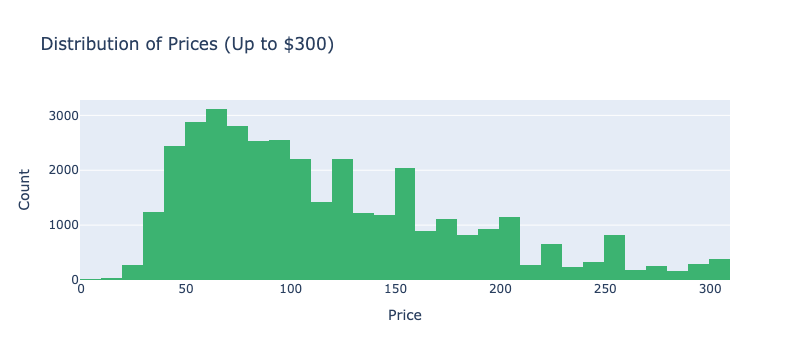

In [115]:
# Analyze the distribution of prices
fig_price = px.histogram(
    filtered_price_df, 
    x='price', 
    nbins=50, 
    title='Distribution of Prices (Up to $300)',
    labels={'price': 'Price'},
    color_discrete_sequence=['mediumseagreen']
)
fig_price.update_layout(
    xaxis_title="Price",
    yaxis_title="Count",
)
fig_price.show()

In [118]:
display(clean_df[['price', 'minimum_nights']].describe())

price  minimum_nights
count  38843.000000    38843.000000
mean     142.317947        5.868059
std      196.945624       17.384784
min        0.000000        1.000000
25%       69.000000        1.000000
50%      101.000000        2.000000
75%      170.000000        4.000000
max    10000.000000     1250.000000

In [120]:
# Display mean statistics
mean_values = clean_df[['price', 'minimum_nights']].mean()
print("Mean values:")
print(mean_values)

Mean values:
price             142.317947
minimum_nights      5.868059
dtype: float64


In [122]:
# Filter the DataFrame for stays with a maximum length of 20 nights and price <= 1000
limited_stay_df = clean_df[(clean_df['minimum_nights'] <= 20) & (clean_df['price'] <= 1000)]

# Calculate the correlation between price and minimum_nights for the filtered data
correlation_limited = limited_stay_df[['price', 'minimum_nights']].corr()
print("Correlation between Price and Minimum Nights (up to 20 nights, Price <= $1,000):")
print(correlation_limited)

Correlation between Price and Minimum Nights (up to 20 nights, Price <= $1,000):
                  price  minimum_nights
price           1.00000         0.01488
minimum_nights  0.01488         1.00000


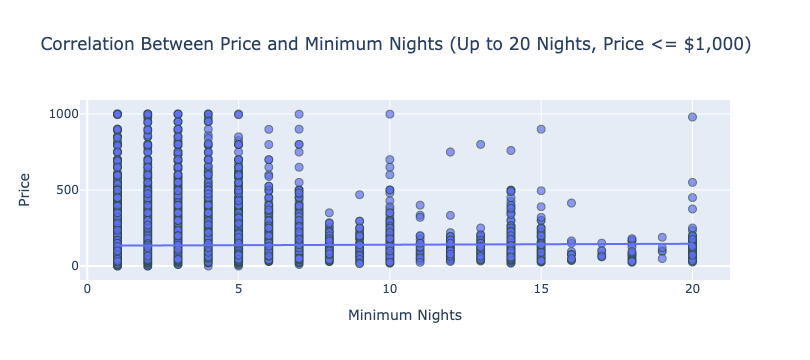

In [125]:
# Visualize the relationship using a scatter plot
fig = px.scatter(
    limited_stay_df,
    x='minimum_nights',
    y='price',
    trendline='ols',
    title='Correlation Between Price and Minimum Nights (Up to 20 Nights, Price <= $1,000)',
    labels={'minimum_nights': 'Minimum Nights', 'price': 'Price'}
)

fig.update_traces(marker=dict(size=8, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.show()